# Data Preprocessing

In this notebook we perform some preprocessing to the raw dataset in order to set it ready for a further, more advanced analysis and forecasting.

### Importing libraries and dataset

In [1]:
# Import pandas
import pandas as pd

In [2]:
# Load dataset into dataframe
df_sales = pd.read_csv('Sales.csv')
df_sales.head()

,product,date,customer,country,sales
0,85123A,2016-12-01,17850,United Kingdom,15.30
1,71053,2016-12-01,17850,United Kingdom,20.34
2,84406B,2016-12-01,17850,United Kingdom,22.00
3,84029G,2016-12-01,17850,United Kingdom,20.34
4,84029E,2016-12-01,17850,United Kingdom,20.34


In [3]:
# Visualize data statistics
df_sales.describe()

,customer,sales
count,406829.000000,406829.000000
mean,15287.690570,20.401854
std,1713.600303,427.591718
min,12346.000000,-168469.600000
25%,13953.000000,4.200000
50%,15152.000000,11.100000
75%,16791.000000,19.500000
max,18287.000000,168469.600000


### Analizing and Preprocessing the data

In [4]:
# Check 'date' datatype
type(df_sales.date[0])

str

In [5]:
# Cast 'date' to datetime
df_sales.date = pd.to_datetime(df_sales.date, format='%Y-%m-%d')
type(df_sales.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
# Eliminate duplicate values
df_sales = df_sales.drop_duplicates(subset=None, keep='first', inplace=False)

In [7]:
# Apply some filtering to obtain a one-year dataset
start_date = "2016-12-01"
end_date = "2017-11-30"

after_start_date = df_sales["date"] >= start_date
before_end_date = df_sales["date"] <= end_date
between_two_dates = after_start_date & before_end_date

df_sales = df_sales.loc[between_two_dates]

In [8]:
# Visualize data statistics
df_sales.describe()

,customer,sales
count,382785.000000,382785.000000
mean,15278.340314,20.598134
std,1712.037074,213.569099
min,12346.000000,-77183.600000
25%,13931.000000,4.250000
50%,15147.000000,11.700000
75%,16778.000000,19.800000
max,18287.000000,77183.600000


### Product Analysis

In [9]:
# Visualize product distribution
products = 100 * df_sales['product'].value_counts() / df_sales['product'].value_counts().sum()
products.head(10)

85123A    0.519090
22423     0.479904
85099B    0.420340
47566     0.361822
84879     0.355291
20725     0.342490
22720     0.309835
POST      0.297817
23203     0.277963
22383     0.276918
Name: product, dtype: float64

In [10]:
# Products are uniformly distributed. 
# Drop 'product' information from the dataset since it won't add any significant contribution to the analysis
df_model_data = df_sales.drop(columns=['product'])
df_model_data

,date,customer,country,sales
0,2016-12-01,17850,United Kingdom,15.30
1,2016-12-01,17850,United Kingdom,20.34
2,2016-12-01,17850,United Kingdom,22.00
3,2016-12-01,17850,United Kingdom,20.34
4,2016-12-01,17850,United Kingdom,20.34
...,...,...,...,...
389163,2017-11-30,15676,United Kingdom,-0.85
389164,2017-11-30,15676,United Kingdom,-3.29
389165,2017-11-30,16717,United Kingdom,-1.25
389166,2017-11-30,16717,United Kingdom,-7.95


### Country Analysis

In [11]:
# Visualize country distribution
countries = df_model_data.country.value_counts().to_frame().reset_index().rename(columns = {'index': 'country',
                                                                                           'country': 'count'})
countries.head(10)

,country,count
0,United Kingdom,339649
1,Germany,9122
2,France,8106
3,EIRE,7095
4,Spain,2457
5,Netherlands,2278
6,Belgium,1971
7,Switzerland,1877
8,Portugal,1352
9,Australia,1251


In [12]:
# Visualize the percentage of sales for each country
c = 100 * df_sales['country'].value_counts() / df_sales['country'].value_counts().sum()
c.head(10)

United Kingdom    88.731011
Germany            2.383061
France             2.117638
EIRE               1.853521
Spain              0.641875
Netherlands        0.595112
Belgium            0.514910
Switzerland        0.490354
Portugal           0.353201
Australia          0.326815
Name: country, dtype: float64

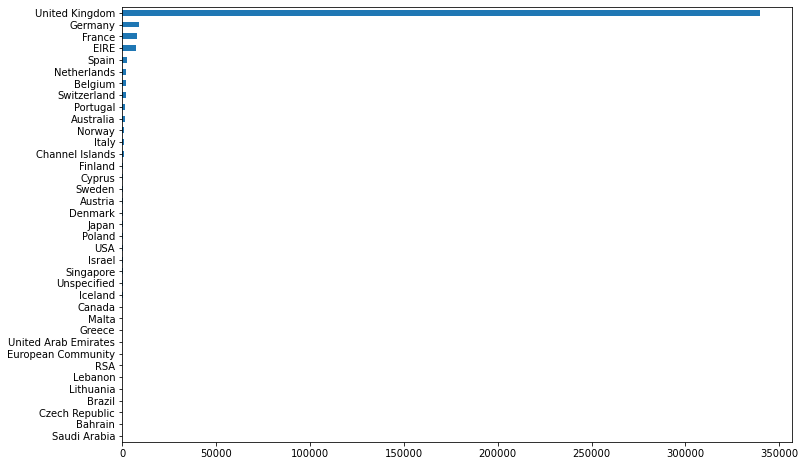

In [13]:
# Plotting the country distribution
df_model_data.country.value_counts().plot(kind='barh', figsize=(12,8)).invert_yaxis()

In [14]:
# Country distribution is highly skewed
# Drop 'country' information from the dataset since it won't add any significant contribution to the analysis
df_model_data.drop(columns = ['country'], inplace=True)
df_model_data

,date,customer,sales
0,2016-12-01,17850,15.30
1,2016-12-01,17850,20.34
2,2016-12-01,17850,22.00
3,2016-12-01,17850,20.34
4,2016-12-01,17850,20.34
...,...,...,...
389163,2017-11-30,15676,-0.85
389164,2017-11-30,15676,-3.29
389165,2017-11-30,16717,-1.25
389166,2017-11-30,16717,-7.95


### Aggregating the dataset

In [15]:
# Keep only year & month information
# Drop the daily detail
df_model_data['date'] = df_model_data['date'].dt.strftime('%Y-%m')

In [16]:
# Aggregating 'sales' information and resetting the index
df_model_data = df_model_data.groupby([df_model_data['date'], 'customer']).sum()

df_model_data = df_model_data.reset_index()
df_model_data

,date,customer,sales
0,2016-12,12347,7.117900e+02
1,2016-12,12348,8.928000e+02
2,2016-12,12370,1.864270e+03
3,2016-12,12377,1.001520e+03
4,2016-12,12383,6.007200e+02
...,...,...,...
12984,2017-11,18263,3.996800e+02
12985,2017-11,18270,1.712000e+02
12986,2017-11,18274,-1.598721e-14
12987,2017-11,18276,-6.250000e+00


The dataset is ready for further advanced analysis.